<a href="https://colab.research.google.com/github/anas1IA/Analysis-of-Bank-Debit-Collections/blob/main/first_project_(2)_(1)_(4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from mlxtend.preprocessing import minmax_scaling
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler



## 2. Importing and organizing the data


In [69]:
data_1year=pd.read_csv('csv_result-1year.csv')
data_2year=pd.read_csv('csv_result-2year .csv')
data_3year=pd.read_csv('csv_result-3year.csv')
data_4year=pd.read_csv('csv_result-4year.csv')
data_5year=pd.read_csv('csv_result-5year.csv')
all_data = pd.concat([data_1year, data_2year, data_3year, data_4year, data_5year], axis=0)


<ipython-input-69-0535a2836d6e>:2: DtypeWarning: Columns (1,2,3,6,7,9,10,11,14,18,22,24,25,29,35,36,38,48,51,55,57,59) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2year=pd.read_csv('csv_result-2year .csv')
<ipython-input-69-0535a2836d6e>:3: DtypeWarning: Columns (15,24) have mixed types. Specify dtype option on import or set low_memory=False.
  data_3year=pd.read_csv('csv_result-3year.csv')
<ipython-input-69-0535a2836d6e>:4: DtypeWarning: Columns (1,2,3,6,7,8,10,11,14,15,16,17,18,22,24,25,26,29,34,35,36,38,48,50,51,57,59) have mixed types. Specify dtype option on import or set low_memory=False.
  data_4year=pd.read_csv('csv_result-4year.csv')


In [70]:
print("{0} Rows and {1} columns for dataset".format(all_data.shape[0],all_data.shape[1]))

43405 Rows and 66 columns for dataset


In [71]:
all_datatwo= all_data.iloc[:, 1:]

In [72]:
all_data.head()

,id,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,1,0.20055,0.37951,0.39641,2.0472,32.351,0.38825,0.24976,1.3305,1.1389,...,0.12196,0.39718,0.87804,0.001924,8.416,5.1372,82.658,4.4158,7.4277,0
1,2,0.20912,0.49988,0.47225,1.9447,14.786,0,0.25834,0.99601,1.6996,...,0.1213,0.42002,0.853,0,4.1486,3.2732,107.35,3.4,60.987,0
2,3,0.24866,0.69592,0.26713,1.5548,-1.1523,0,0.30906,0.43695,1.309,...,0.24114,0.81774,0.76599,0.69484,4.9909,3.951,134.27,2.7185,5.2078,0
3,4,0.081483,0.30734,0.45879,2.4928,51.952,0.14988,0.092704,1.8661,1.0571,...,0.054015,0.14207,0.94598,0,4.5746,3.6147,86.435,4.2228,5.5497,0
4,5,0.18732,0.61323,0.2296,1.4063,-7.3128,0.18732,0.18732,0.6307,1.1559,...,0.13485,0.48431,0.86515,0.12444,6.3985,4.3158,127.21,2.8692,7.898,0


In [73]:
all_datatwo.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.20055,0.37951,0.39641,2.0472,32.351,0.38825,0.24976,1.3305,1.1389,0.50494,...,0.12196,0.39718,0.87804,0.001924,8.416,5.1372,82.658,4.4158,7.4277,0
1,0.20912,0.49988,0.47225,1.9447,14.786,0,0.25834,0.99601,1.6996,0.49788,...,0.1213,0.42002,0.853,0,4.1486,3.2732,107.35,3.4,60.987,0
2,0.24866,0.69592,0.26713,1.5548,-1.1523,0,0.30906,0.43695,1.309,0.30408,...,0.24114,0.81774,0.76599,0.69484,4.9909,3.951,134.27,2.7185,5.2078,0
3,0.081483,0.30734,0.45879,2.4928,51.952,0.14988,0.092704,1.8661,1.0571,0.57353,...,0.054015,0.14207,0.94598,0,4.5746,3.6147,86.435,4.2228,5.5497,0
4,0.18732,0.61323,0.2296,1.4063,-7.3128,0.18732,0.18732,0.6307,1.1559,0.38677,...,0.13485,0.48431,0.86515,0.12444,6.3985,4.3158,127.21,2.8692,7.898,0


In [74]:
all_datatwo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43405 entries, 0 to 5909
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Attr1   43405 non-null  object
 1   Attr2   43405 non-null  object
 2   Attr3   43405 non-null  object
 3   Attr4   43405 non-null  object
 4   Attr5   43405 non-null  object
 5   Attr6   43405 non-null  object
 6   Attr7   43405 non-null  object
 7   Attr8   43405 non-null  object
 8   Attr9   43405 non-null  object
 9   Attr10  43405 non-null  object
 10  Attr11  43405 non-null  object
 11  Attr12  43405 non-null  object
 12  Attr13  43405 non-null  object
 13  Attr14  43405 non-null  object
 14  Attr15  43405 non-null  object
 15  Attr16  43405 non-null  object
 16  Attr17  43405 non-null  object
 17  Attr18  43405 non-null  object
 18  Attr19  43405 non-null  object
 19  Attr20  43405 non-null  object
 20  Attr21  43405 non-null  object
 21  Attr22  43405 non-null  object
 22  Attr23  43405 non-null 

In [75]:
all_datatwo.shape

(43405, 65)

In [76]:
all_datatwo.dtypes

Attr1     object
Attr2     object
Attr3     object
Attr4     object
Attr5     object
           ...  
Attr61    object
Attr62    object
Attr63    object
Attr64    object
class      int64
Length: 65, dtype: object

In [77]:
from sklearn.preprocessing import LabelEncoder
# Assuming 'df' contains 'class' column
label_encoder = LabelEncoder()

# Convert class labels to integers
all_datatwo['class'] = label_encoder.fit_transform(all_datatwo['class'])

In [78]:
all_datatwo['class'].value_counts()

0    41314
1     2091
Name: class, dtype: int64

In [79]:
all_datatwo

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.20055,0.37951,0.39641,2.0472,32.351,0.38825,0.24976,1.3305,1.1389,0.50494,...,0.12196,0.39718,0.87804,0.001924,8.416,5.1372,82.658,4.4158,7.4277,0
1,0.20912,0.49988,0.47225,1.9447,14.786,0,0.25834,0.99601,1.6996,0.49788,...,0.1213,0.42002,0.853,0,4.1486,3.2732,107.35,3.4,60.987,0
2,0.24866,0.69592,0.26713,1.5548,-1.1523,0,0.30906,0.43695,1.309,0.30408,...,0.24114,0.81774,0.76599,0.69484,4.9909,3.951,134.27,2.7185,5.2078,0
3,0.081483,0.30734,0.45879,2.4928,51.952,0.14988,0.092704,1.8661,1.0571,0.57353,...,0.054015,0.14207,0.94598,0,4.5746,3.6147,86.435,4.2228,5.5497,0
4,0.18732,0.61323,0.2296,1.4063,-7.3128,0.18732,0.18732,0.6307,1.1559,0.38677,...,0.13485,0.48431,0.86515,0.12444,6.3985,4.3158,127.21,2.8692,7.898,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905,0.012898,0.70621,0.038857,1.1722,-18.907,0,0.013981,0.416,1.6768,0.29379,...,0.020169,0.043904,1.0122,1.2594,13.472,12.432,49.117,7.4313,2.2799,1
5906,-0.57805,0.96702,-0.80085,0.16576,-67.365,-0.57805,-0.57805,-0.40334,0.93979,-0.39004,...,-0.064073,1.482,1.0641,-0.018084,110.72,44.759,81.22,4.494,5.1305,1
5907,-0.17905,1.2553,-0.27599,0.74554,-120.44,-0.17905,-0.15493,-0.26018,1.1749,-0.32659,...,0.14888,0.54824,0.85112,-0.52243,9.8526,3.4892,207.87,1.7559,9.9527,1
5908,-0.10886,0.74394,0.015449,1.0878,-17.003,-0.10886,-0.10918,0.12531,0.84516,0.093224,...,-0.1832,-1.1677,1.1832,6.0924,13.886,6.0769,83.122,4.3911,0.95575,1


In [80]:
#Listing the names of all features
data_keys=list(all_datatwo.columns)
len(data_keys)

65

In [81]:
#Checking the unique values in the Class-Feature
all_datatwo['class'].unique()

array([0, 1])

In [82]:
all_datatwo['class'].dtype #The datatype for the CLASS-Feature is now converted into INT type.

dtype('int64')

<Axes: title={'center': 'Distribution of Class Labels in Data'}>

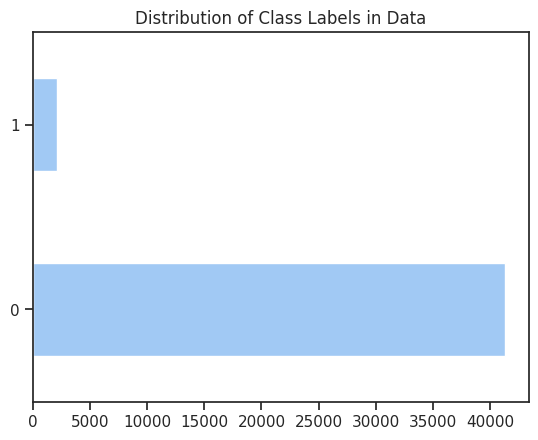

In [83]:
plt.title('Distribution of Class Labels in Data')
all_data['class'].value_counts().plot(kind = 'barh')

## 3. Data Analysis and Preprocessing

## Data Cleaning

Missing Values Solving

In [84]:
all_datathree= all_datatwo.astype(str)
all_datathree.replace("?", float('nan'), inplace=True)

In [85]:
missing_values_count=all_datathree.isna().sum()
# look at the # of missing points in the first ten columns
print(missing_values_count)


Attr1       8
Attr2       8
Attr3       8
Attr4     134
Attr5      89
         ... 
Attr61    102
Attr62    127
Attr63    134
Attr64    812
class       0
Length: 65, dtype: int64


In [86]:
total_cells = np.product(all_datathree.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

1.4646309801245867


In [87]:
formulas = [
    "net profit / total assets",
    "total liabilities / total assets",
    "working capital / total assets",
    "current assets / short-term liabilities",
    "(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation) * 365",
    "retained earnings / total assets",
    "EBIT / total assets",
    "book value of equity / total liabilities",
    "sales / total assets",
    "equity / total assets",
    "(gross profit + extraordinary items + financial expenses) / total assets",
    "gross profit / short-term liabilities",
    "(gross profit + depreciation) / sales",
    "(gross profit + interest) / total assets",
    "(total liabilities * 365) / (gross profit + depreciation)",
    "(gross profit + depreciation) / total liabilities",
    "total assets / total liabilities",
    "gross profit / total assets",
    "gross profit / sales",
    "(inventory * 365) / sales",
    "sales (n) / sales (n-1)",
    "profit on operating activities / total assets",
    "net profit / sales",
    "gross profit (in 3 years) / total assets",
    "(equity - share capital) / total assets",
    "(net profit + depreciation) / total liabilities",
    "profit on operating activities / financial expenses",
    "working capital / fixed assets",
    "logarithm of total assets",
    "(total liabilities - cash) / sales",
    "(gross profit + interest) / sales",
    "(current liabilities * 365) / cost of products sold",
    "operating expenses / short-term liabilities",
    "operating expenses / total liabilities",
    "profit on sales / total assets",
    "total sales / total assets",
    "(current assets - inventories) / long-term liabilities",
    "constant capital / total assets",
    "profit on sales / sales",
    "(current assets - inventory - receivables) / short-term liabilities",
    "total liabilities / ((profit on operating activities + depreciation) * (12/365))",
    "profit on operating activities / sales",
    "rotation receivables + inventory turnover in days",
    "(receivables * 365) / sales",
    "net profit / inventory",
    "(current assets - inventory) / short-term liabilities",
    "(inventory * 365) / cost of products sold",
    "EBITDA (profit on operating activities - depreciation) / total assets",
    "EBITDA (profit on operating activities - depreciation) / sales",
    "current assets / total liabilities",
    "short-term liabilities / total assets",
    "(short-term liabilities * 365) / cost of products sold",
    "equity / fixed assets",
    "constant capital / fixed assets",
    "working capital",
    "(sales - cost of products sold) / sales",
    "(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)",
    "total costs / total sales",
    "long-term liabilities / equity",
    "sales / inventory",
    "sales / receivables",
    "(short-term liabilities * 365) / sales",
    "sales / short-term liabilities",
    "sales / fixed assets",
    "bankruptcy status",
]


In [88]:
all_datathree.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43405 entries, 0 to 5909
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Attr1   43397 non-null  object
 1   Attr2   43397 non-null  object
 2   Attr3   43397 non-null  object
 3   Attr4   43271 non-null  object
 4   Attr5   43316 non-null  object
 5   Attr6   43397 non-null  object
 6   Attr7   43397 non-null  object
 7   Attr8   43311 non-null  object
 8   Attr9   43396 non-null  object
 9   Attr10  43397 non-null  object
 10  Attr11  43361 non-null  object
 11  Attr12  43271 non-null  object
 12  Attr13  43278 non-null  object
 13  Attr14  43397 non-null  object
 14  Attr15  43369 non-null  object
 15  Attr16  43310 non-null  object
 16  Attr17  43311 non-null  object
 17  Attr18  43397 non-null  object
 18  Attr19  43277 non-null  object
 19  Attr20  43278 non-null  object
 20  Attr21  37551 non-null  object
 21  Attr22  43397 non-null  object
 22  Attr23  43278 non-null 

Text(0.5, 1.0, 'Missing values in Dataset')

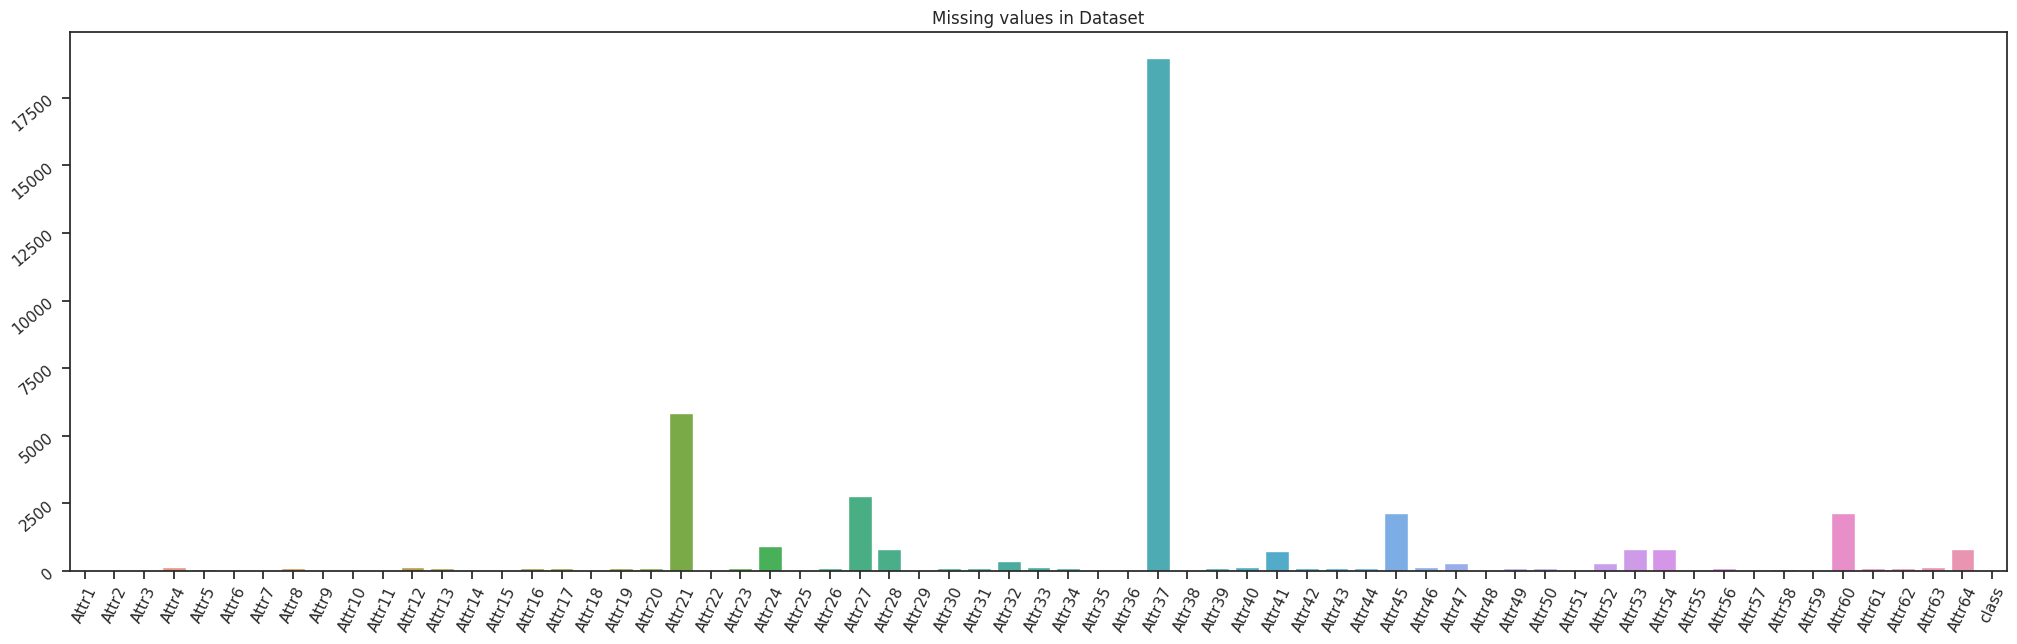

In [89]:
plt.figure(figsize = (25,7))
plt.xticks(rotation=65)
plt.yticks(rotation=40)
sns.set_theme(style = "ticks", palette = "pastel")
sns.barplot(x = all_datathree.columns,y = all_datathree.isna().sum().values)
plt.title("Missing values in Dataset")

In [90]:
all_datathree.columns=formulas
all_datathree

,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation) * 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,equity / total assets,...,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs / total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities * 365) / sales,sales / short-term liabilities,sales / fixed assets,bankruptcy status
0,0.20055,0.37951,0.39641,2.0472,32.351,0.38825,0.24976,1.3305,1.1389,0.50494,...,0.12196,0.39718,0.87804,0.001924,8.416,5.1372,82.658,4.4158,7.4277,0
1,0.20912,0.49988,0.47225,1.9447,14.786,0,0.25834,0.99601,1.6996,0.49788,...,0.1213,0.42002,0.853,0,4.1486,3.2732,107.35,3.4,60.987,0
2,0.24866,0.69592,0.26713,1.5548,-1.1523,0,0.30906,0.43695,1.309,0.30408,...,0.24114,0.81774,0.76599,0.69484,4.9909,3.951,134.27,2.7185,5.2078,0
3,0.081483,0.30734,0.45879,2.4928,51.952,0.14988,0.092704,1.8661,1.0571,0.57353,...,0.054015,0.14207,0.94598,0,4.5746,3.6147,86.435,4.2228,5.5497,0
4,0.18732,0.61323,0.2296,1.4063,-7.3128,0.18732,0.18732,0.6307,1.1559,0.38677,...,0.13485,0.48431,0.86515,0.12444,6.3985,4.3158,127.21,2.8692,7.898,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905,0.012898,0.70621,0.038857,1.1722,-18.907,0,0.013981,0.416,1.6768,0.29379,...,0.020169,0.043904,1.0122,1.2594,13.472,12.432,49.117,7.4313,2.2799,1
5906,-0.57805,0.96702,-0.80085,0.16576,-67.365,-0.57805,-0.57805,-0.40334,0.93979,-0.39004,...,-0.064073,1.482,1.0641,-0.018084,110.72,44.759,81.22,4.494,5.1305,1
5907,-0.17905,1.2553,-0.27599,0.74554,-120.44,-0.17905,-0.15493,-0.26018,1.1749,-0.32659,...,0.14888,0.54824,0.85112,-0.52243,9.8526,3.4892,207.87,1.7559,9.9527,1
5908,-0.10886,0.74394,0.015449,1.0878,-17.003,-0.10886,-0.10918,0.12531,0.84516,0.093224,...,-0.1832,-1.1677,1.1832,6.0924,13.886,6.0769,83.122,4.3911,0.95575,1


<Figure size 5000x6000 with 0 Axes>

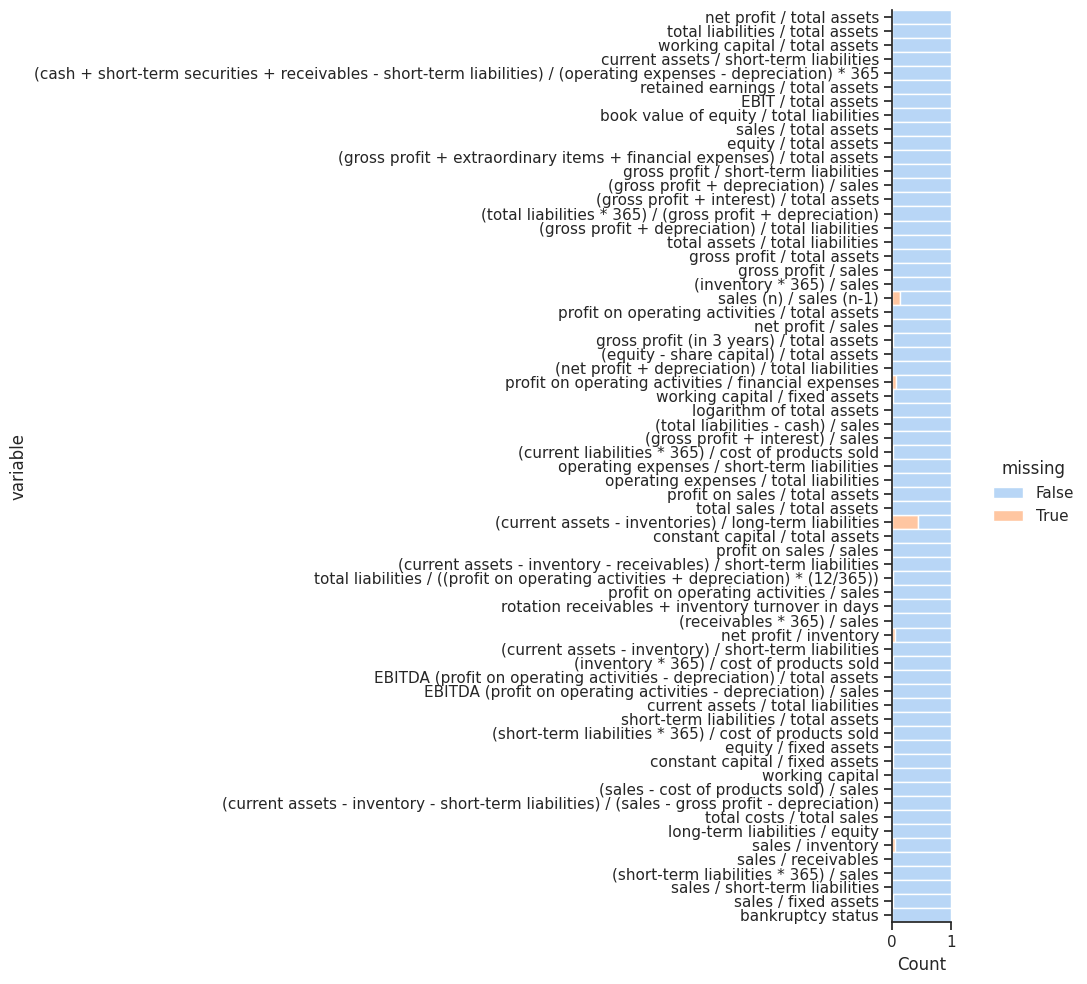

In [91]:
plt.figure(figsize=(50,60))
pltmv=sns.displot(data=all_datathree.isna().melt(value_name="missing"),
            y="variable",hue="missing",
            multiple="fill",height=10,aspect=1)
plt.savefig("visualizing_missing_data_with_barplot.png", dpi=100)

In [92]:
import missingno as msno

Text(0.5, 1.0, 'Missing data distribution')

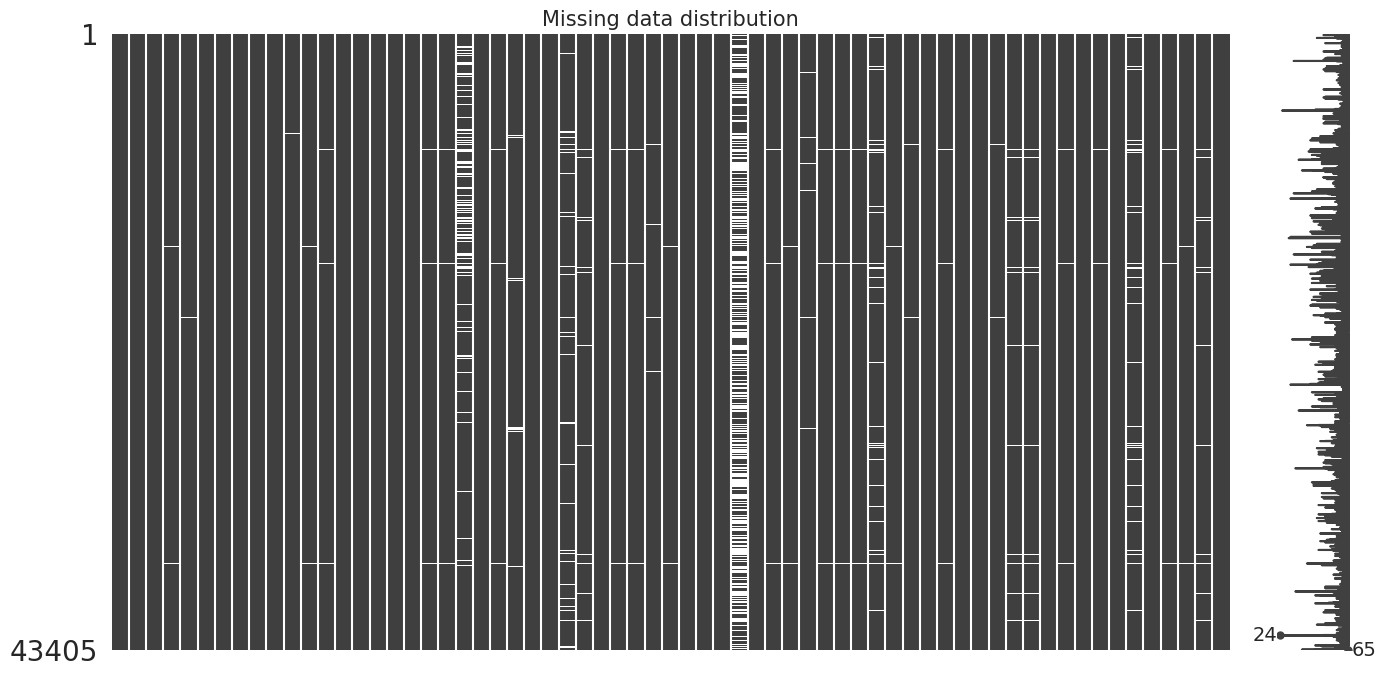

In [93]:
msno.matrix(all_datathree, figsize=(16,8))
plt.title("Missing data distribution", size=15)

In [94]:
all_datathree

,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation) * 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,equity / total assets,...,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs / total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities * 365) / sales,sales / short-term liabilities,sales / fixed assets,bankruptcy status
0,0.20055,0.37951,0.39641,2.0472,32.351,0.38825,0.24976,1.3305,1.1389,0.50494,...,0.12196,0.39718,0.87804,0.001924,8.416,5.1372,82.658,4.4158,7.4277,0
1,0.20912,0.49988,0.47225,1.9447,14.786,0,0.25834,0.99601,1.6996,0.49788,...,0.1213,0.42002,0.853,0,4.1486,3.2732,107.35,3.4,60.987,0
2,0.24866,0.69592,0.26713,1.5548,-1.1523,0,0.30906,0.43695,1.309,0.30408,...,0.24114,0.81774,0.76599,0.69484,4.9909,3.951,134.27,2.7185,5.2078,0
3,0.081483,0.30734,0.45879,2.4928,51.952,0.14988,0.092704,1.8661,1.0571,0.57353,...,0.054015,0.14207,0.94598,0,4.5746,3.6147,86.435,4.2228,5.5497,0
4,0.18732,0.61323,0.2296,1.4063,-7.3128,0.18732,0.18732,0.6307,1.1559,0.38677,...,0.13485,0.48431,0.86515,0.12444,6.3985,4.3158,127.21,2.8692,7.898,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905,0.012898,0.70621,0.038857,1.1722,-18.907,0,0.013981,0.416,1.6768,0.29379,...,0.020169,0.043904,1.0122,1.2594,13.472,12.432,49.117,7.4313,2.2799,1
5906,-0.57805,0.96702,-0.80085,0.16576,-67.365,-0.57805,-0.57805,-0.40334,0.93979,-0.39004,...,-0.064073,1.482,1.0641,-0.018084,110.72,44.759,81.22,4.494,5.1305,1
5907,-0.17905,1.2553,-0.27599,0.74554,-120.44,-0.17905,-0.15493,-0.26018,1.1749,-0.32659,...,0.14888,0.54824,0.85112,-0.52243,9.8526,3.4892,207.87,1.7559,9.9527,1
5908,-0.10886,0.74394,0.015449,1.0878,-17.003,-0.10886,-0.10918,0.12531,0.84516,0.093224,...,-0.1832,-1.1677,1.1832,6.0924,13.886,6.0769,83.122,4.3911,0.95575,1


#### 3.A.b Generate Heat Map for the missing data   
Now, let us find out if there is some correlation among the missing features.    

Using the `heatmap` function from `missingno` library, let us plot the heatmaps for all the dataframes.

<Axes: >

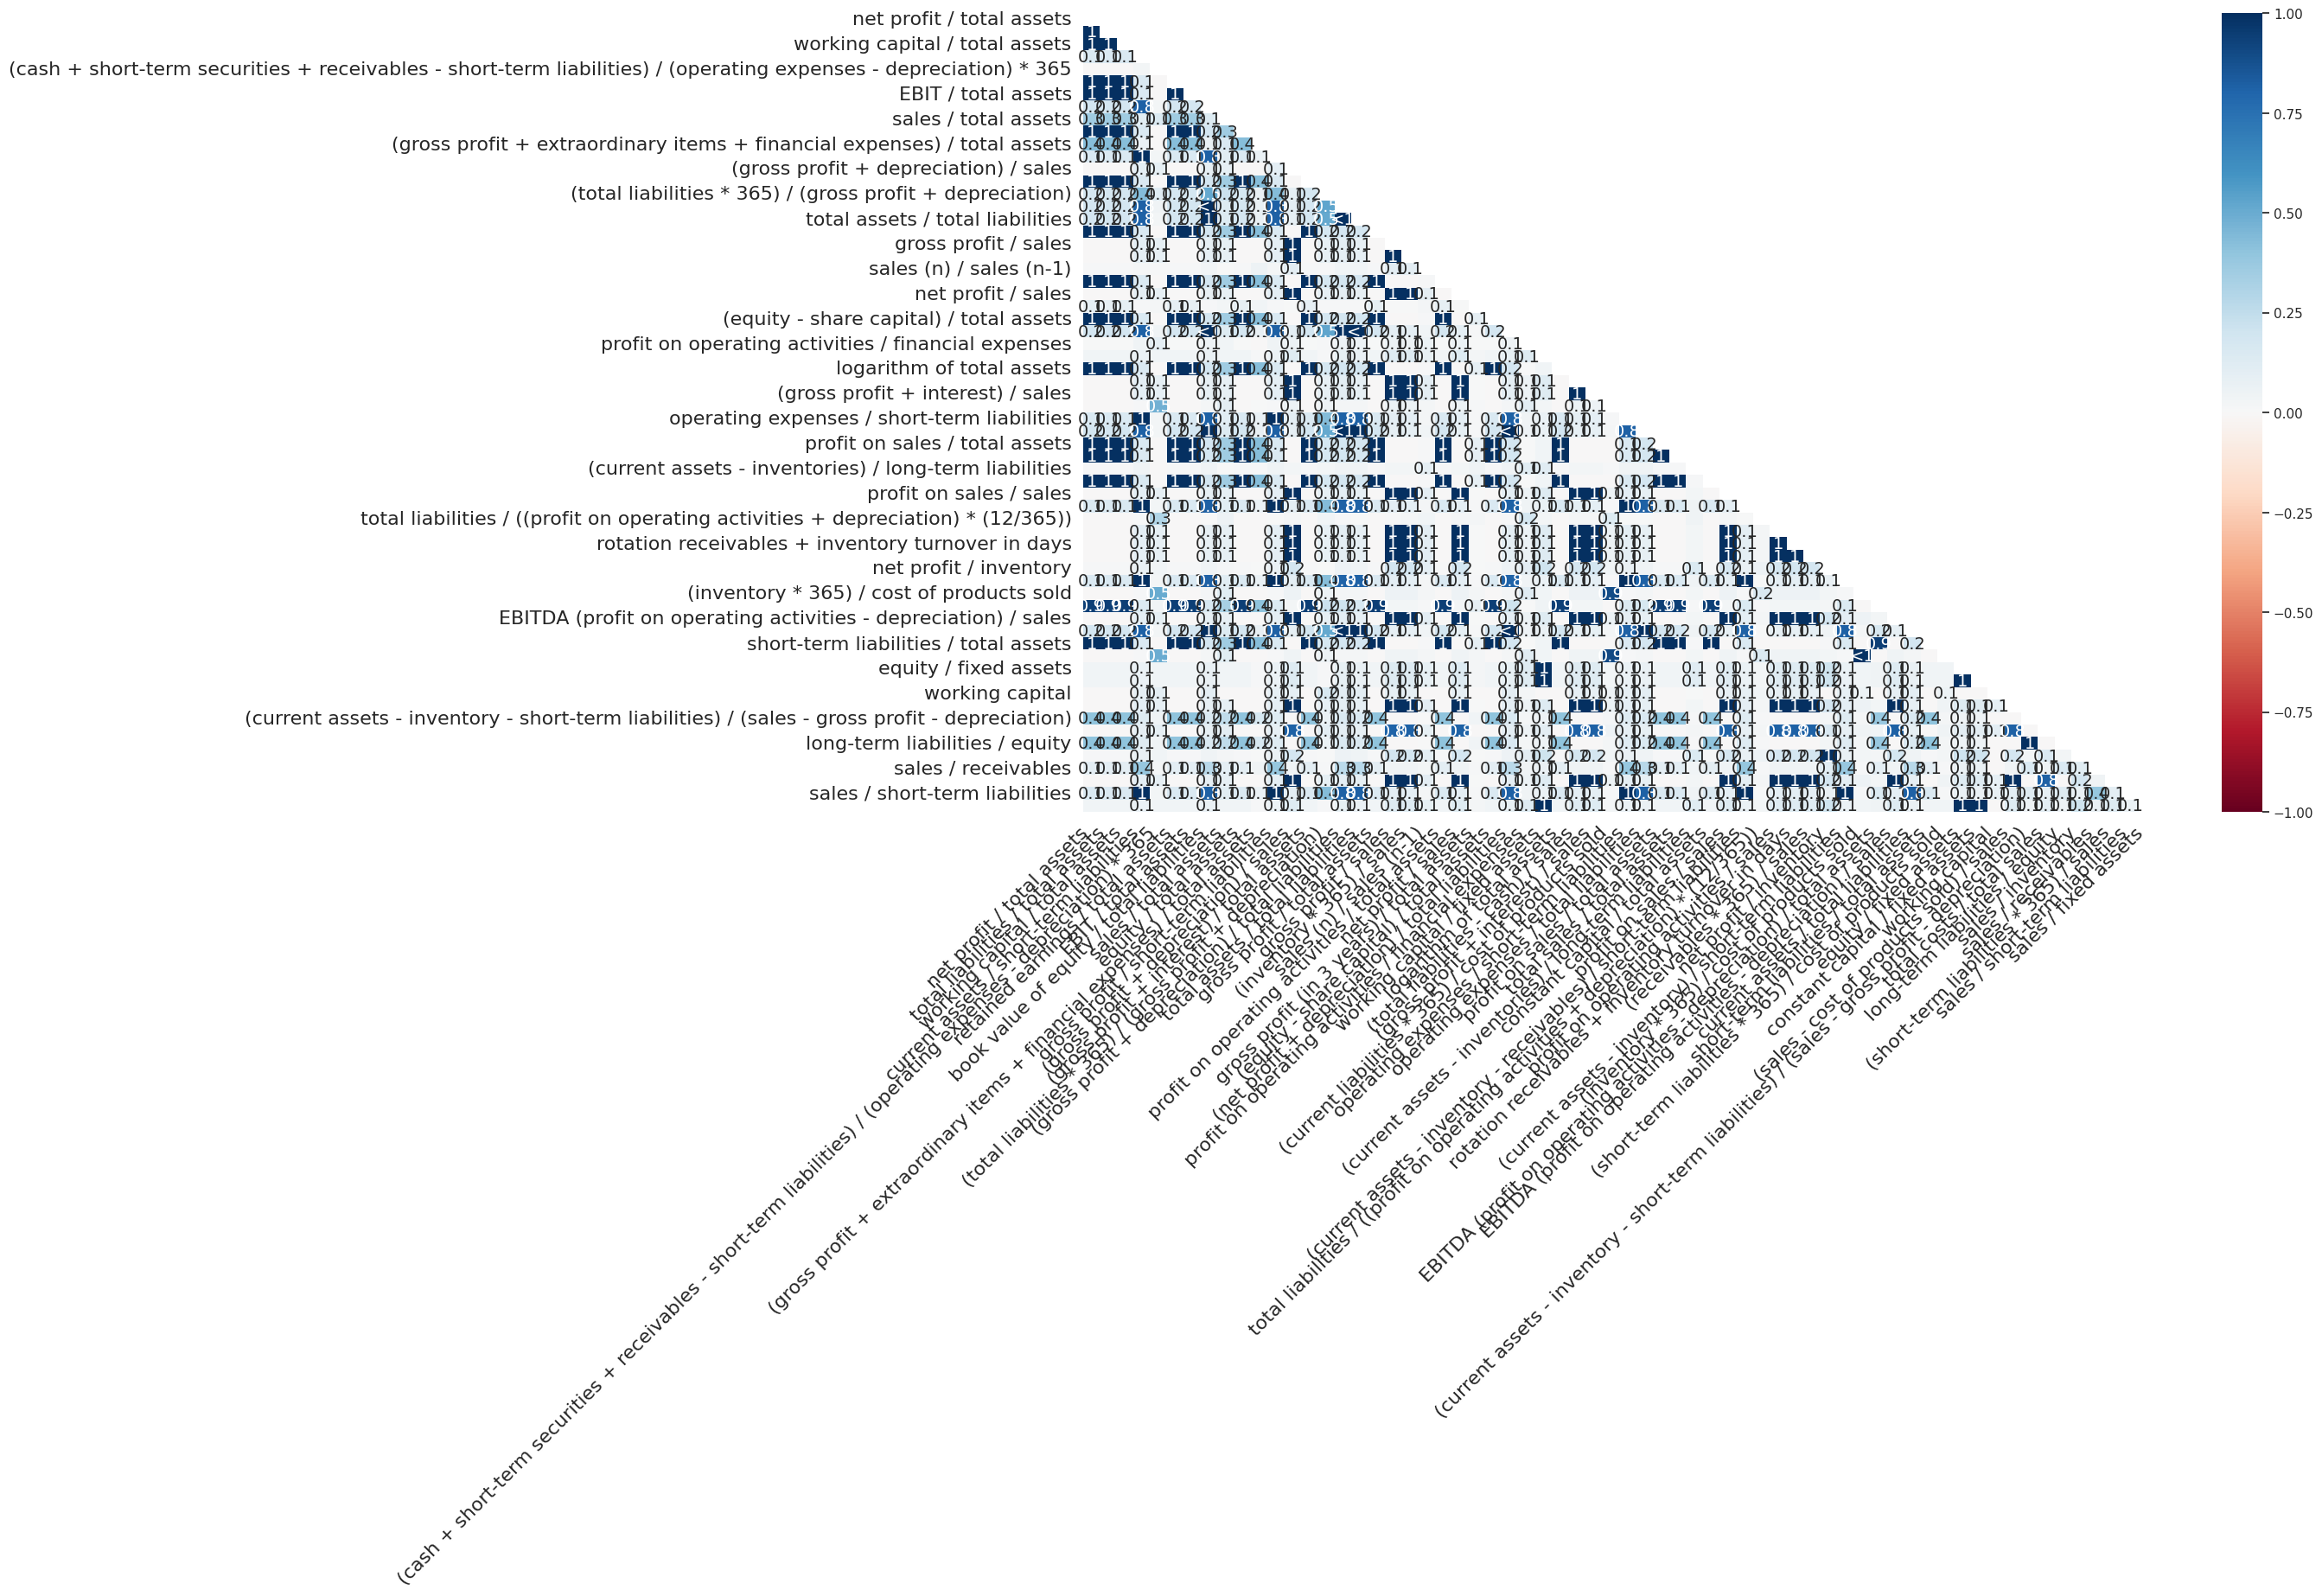

In [95]:
msno.heatmap(all_datathree)

##Handling duplicate data


In [96]:
def duplicated_data(data):
  duplicates = data.duplicated()
  num_duplicates = duplicates.sum()
  print(f"Number of duplicated rows: {num_duplicates}")
  data_cleaned = data.drop_duplicates()
  return  data_cleaned

In [97]:
data_impyte=duplicated_data(all_datathree)

Number of duplicated rows: 392


In [98]:
data_impyte

,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation) * 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,equity / total assets,...,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs / total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities * 365) / sales,sales / short-term liabilities,sales / fixed assets,bankruptcy status
0,0.20055,0.37951,0.39641,2.0472,32.351,0.38825,0.24976,1.3305,1.1389,0.50494,...,0.12196,0.39718,0.87804,0.001924,8.416,5.1372,82.658,4.4158,7.4277,0
1,0.20912,0.49988,0.47225,1.9447,14.786,0,0.25834,0.99601,1.6996,0.49788,...,0.1213,0.42002,0.853,0,4.1486,3.2732,107.35,3.4,60.987,0
2,0.24866,0.69592,0.26713,1.5548,-1.1523,0,0.30906,0.43695,1.309,0.30408,...,0.24114,0.81774,0.76599,0.69484,4.9909,3.951,134.27,2.7185,5.2078,0
3,0.081483,0.30734,0.45879,2.4928,51.952,0.14988,0.092704,1.8661,1.0571,0.57353,...,0.054015,0.14207,0.94598,0,4.5746,3.6147,86.435,4.2228,5.5497,0
4,0.18732,0.61323,0.2296,1.4063,-7.3128,0.18732,0.18732,0.6307,1.1559,0.38677,...,0.13485,0.48431,0.86515,0.12444,6.3985,4.3158,127.21,2.8692,7.898,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905,0.012898,0.70621,0.038857,1.1722,-18.907,0,0.013981,0.416,1.6768,0.29379,...,0.020169,0.043904,1.0122,1.2594,13.472,12.432,49.117,7.4313,2.2799,1
5906,-0.57805,0.96702,-0.80085,0.16576,-67.365,-0.57805,-0.57805,-0.40334,0.93979,-0.39004,...,-0.064073,1.482,1.0641,-0.018084,110.72,44.759,81.22,4.494,5.1305,1
5907,-0.17905,1.2553,-0.27599,0.74554,-120.44,-0.17905,-0.15493,-0.26018,1.1749,-0.32659,...,0.14888,0.54824,0.85112,-0.52243,9.8526,3.4892,207.87,1.7559,9.9527,1
5908,-0.10886,0.74394,0.015449,1.0878,-17.003,-0.10886,-0.10918,0.12531,0.84516,0.093224,...,-0.1832,-1.1677,1.1832,6.0924,13.886,6.0769,83.122,4.3911,0.95575,1


##Data imputation


####Mean imputation

In [99]:
data_impyte.dtypes

net profit / total assets                                                                                            object
total liabilities / total assets                                                                                     object
working capital / total assets                                                                                       object
current assets / short-term liabilities                                                                              object
(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation) * 365    object
                                                                                                                      ...  
sales / receivables                                                                                                  object
(short-term liabilities * 365) / sales                                                                               object
sales / 

In [100]:
def convert_columns_type_float(dfs):
        index=0
        while(index<=63):
            colname = dfs.columns[index]
            col = getattr(dfs, colname)
            dfs[colname] = col.astype(float)
            index+=1

convert_columns_type_float(data_impyte)

<ipython-input-100-5578082b0f33>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs[colname] = col.astype(float)


In [101]:
data_impyte.dtypes

net profit / total assets                                                                                            float64
total liabilities / total assets                                                                                     float64
working capital / total assets                                                                                       float64
current assets / short-term liabilities                                                                              float64
(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation) * 365    float64
                                                                                                                      ...   
sales / receivables                                                                                                  float64
(short-term liabilities * 365) / sales                                                                               float64


In [102]:
def convert_class_label_type_int(df,Y):
        col = getattr(df, Y)
        df[Y] = col.astype(int)
convert_class_label_type_int(data_impyte,"bankruptcy status")


<ipython-input-102-88c0b30f4e2a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[Y] = col.astype(int)


In [103]:
data_impyte.dtypes

net profit / total assets                                                                                            float64
total liabilities / total assets                                                                                     float64
working capital / total assets                                                                                       float64
current assets / short-term liabilities                                                                              float64
(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation) * 365    float64
                                                                                                                      ...   
sales / receivables                                                                                                  float64
(short-term liabilities * 365) / sales                                                                               float64


In [104]:
data_impyte

,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation) * 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,equity / total assets,...,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs / total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities * 365) / sales,sales / short-term liabilities,sales / fixed assets,bankruptcy status
0,0.200550,0.37951,0.396410,2.04720,32.3510,0.38825,0.249760,1.33050,1.13890,0.504940,...,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.42770,0
1,0.209120,0.49988,0.472250,1.94470,14.7860,0.00000,0.258340,0.99601,1.69960,0.497880,...,0.121300,0.420020,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.98700,0
2,0.248660,0.69592,0.267130,1.55480,-1.1523,0.00000,0.309060,0.43695,1.30900,0.304080,...,0.241140,0.817740,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.20780,0
3,0.081483,0.30734,0.458790,2.49280,51.9520,0.14988,0.092704,1.86610,1.05710,0.573530,...,0.054015,0.142070,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.54970,0
4,0.187320,0.61323,0.229600,1.40630,-7.3128,0.18732,0.187320,0.63070,1.15590,0.386770,...,0.134850,0.484310,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.89800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905,0.012898,0.70621,0.038857,1.17220,-18.9070,0.00000,0.013981,0.41600,1.67680,0.293790,...,0.020169,0.043904,1.01220,1.259400,13.4720,12.4320,49.117,7.4313,2.27990,1
5906,-0.578050,0.96702,-0.800850,0.16576,-67.3650,-0.57805,-0.578050,-0.40334,0.93979,-0.390040,...,-0.064073,1.482000,1.06410,-0.018084,110.7200,44.7590,81.220,4.4940,5.13050,1
5907,-0.179050,1.25530,-0.275990,0.74554,-120.4400,-0.17905,-0.154930,-0.26018,1.17490,-0.326590,...,0.148880,0.548240,0.85112,-0.522430,9.8526,3.4892,207.870,1.7559,9.95270,1
5908,-0.108860,0.74394,0.015449,1.08780,-17.0030,-0.10886,-0.109180,0.12531,0.84516,0.093224,...,-0.183200,-1.167700,1.18320,6.092400,13.8860,6.0769,83.122,4.3911,0.95575,1


In [105]:
def meanImpute(df):
  for feature in df.columns:
    df[feature].fillna(df[feature].mean(),inplace=True)
  return df

In [106]:
mean_imputed_dataframes=meanImpute(data_impyte)

<ipython-input-105-07d135cab429>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature].fillna(df[feature].mean(),inplace=True)


In [107]:
mean_imputed_dataframes

,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation) * 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,equity / total assets,...,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs / total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities * 365) / sales,sales / short-term liabilities,sales / fixed assets,bankruptcy status
0,0.200550,0.37951,0.396410,2.04720,32.3510,0.38825,0.249760,1.33050,1.13890,0.504940,...,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.42770,0
1,0.209120,0.49988,0.472250,1.94470,14.7860,0.00000,0.258340,0.99601,1.69960,0.497880,...,0.121300,0.420020,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.98700,0
2,0.248660,0.69592,0.267130,1.55480,-1.1523,0.00000,0.309060,0.43695,1.30900,0.304080,...,0.241140,0.817740,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.20780,0
3,0.081483,0.30734,0.458790,2.49280,51.9520,0.14988,0.092704,1.86610,1.05710,0.573530,...,0.054015,0.142070,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.54970,0
4,0.187320,0.61323,0.229600,1.40630,-7.3128,0.18732,0.187320,0.63070,1.15590,0.386770,...,0.134850,0.484310,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.89800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905,0.012898,0.70621,0.038857,1.17220,-18.9070,0.00000,0.013981,0.41600,1.67680,0.293790,...,0.020169,0.043904,1.01220,1.259400,13.4720,12.4320,49.117,7.4313,2.27990,1
5906,-0.578050,0.96702,-0.800850,0.16576,-67.3650,-0.57805,-0.578050,-0.40334,0.93979,-0.390040,...,-0.064073,1.482000,1.06410,-0.018084,110.7200,44.7590,81.220,4.4940,5.13050,1
5907,-0.179050,1.25530,-0.275990,0.74554,-120.4400,-0.17905,-0.154930,-0.26018,1.17490,-0.326590,...,0.148880,0.548240,0.85112,-0.522430,9.8526,3.4892,207.870,1.7559,9.95270,1
5908,-0.108860,0.74394,0.015449,1.08780,-17.0030,-0.10886,-0.109180,0.12531,0.84516,0.093224,...,-0.183200,-1.167700,1.18320,6.092400,13.8860,6.0769,83.122,4.3911,0.95575,1


In [108]:
print('Missing values in data',mean_imputed_dataframes.isna().any().sum()) ##There are no Missing values

Missing values in data 0


####k-Nearest Neighbors (k-NN) Imputation

In [109]:
from sklearn.impute import KNNImputer

In [110]:
def perform_KNN_imputation(df,k,Y):
  bankruptcy_status = df[Y]
  imputed_data =  KNNImputer(n_neighbors=k).fit_transform( df.drop(columns=[Y]) )
  imputed_df=pd.DataFrame(data=imputed_data, columns= df.drop(columns=[Y]).columns)
  bankruptcy_status = bankruptcy_status.reset_index(drop=True)
  imputed_df[Y] = bankruptcy_status
  return  imputed_df

In [111]:
 knn_imputed_dataframes=perform_KNN_imputation(data_impyte,100,'bankruptcy status')

In [112]:
 knn_imputed_dataframes

,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation) * 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,equity / total assets,...,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs / total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities * 365) / sales,sales / short-term liabilities,sales / fixed assets,bankruptcy status
0,0.200550,0.37951,0.396410,2.04720,32.3510,0.38825,0.249760,1.33050,1.13890,0.504940,...,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.42770,0
1,0.209120,0.49988,0.472250,1.94470,14.7860,0.00000,0.258340,0.99601,1.69960,0.497880,...,0.121300,0.420020,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.98700,0
2,0.248660,0.69592,0.267130,1.55480,-1.1523,0.00000,0.309060,0.43695,1.30900,0.304080,...,0.241140,0.817740,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.20780,0
3,0.081483,0.30734,0.458790,2.49280,51.9520,0.14988,0.092704,1.86610,1.05710,0.573530,...,0.054015,0.142070,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.54970,0
4,0.187320,0.61323,0.229600,1.40630,-7.3128,0.18732,0.187320,0.63070,1.15590,0.386770,...,0.134850,0.484310,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.89800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43008,0.012898,0.70621,0.038857,1.17220,-18.9070,0.00000,0.013981,0.41600,1.67680,0.293790,...,0.020169,0.043904,1.01220,1.259400,13.4720,12.4320,49.117,7.4313,2.27990,1
43009,-0.578050,0.96702,-0.800850,0.16576,-67.3650,-0.57805,-0.578050,-0.40334,0.93979,-0.390040,...,-0.064073,1.482000,1.06410,-0.018084,110.7200,44.7590,81.220,4.4940,5.13050,1
43010,-0.179050,1.25530,-0.275990,0.74554,-120.4400,-0.17905,-0.154930,-0.26018,1.17490,-0.326590,...,0.148880,0.548240,0.85112,-0.522430,9.8526,3.4892,207.870,1.7559,9.95270,1
43011,-0.108860,0.74394,0.015449,1.08780,-17.0030,-0.10886,-0.109180,0.12531,0.84516,0.093224,...,-0.183200,-1.167700,1.18320,6.092400,13.8860,6.0769,83.122,4.3911,0.95575,1


In [113]:
print('Missing values in data', knn_imputed_dataframes.isna().any().sum()) ##There are no Missing values

Missing values in data 0


#### 3.B.c Expectation-Maximization (EM) Imputation

In [114]:
from sklearn.impute import SimpleImputer

In [115]:
!pip install fancyimpute

In [116]:
import numpy as np
import pandas as pd
from fancyimpute import IterativeImputer
def perform_EM_imputation(df,k,Y):
    bankruptcy_status = df[Y]
    em_imputer = IterativeImputer(max_iter=k, random_state=0)
    em_imputed_data = em_imputer.fit_transform(df.drop(columns=[Y]))
    em_imputed_df = pd.DataFrame(data=em_imputed_data, columns=df.drop(columns=[Y]).columns)
    bankruptcy_status = bankruptcy_status.reset_index(drop=True)
    em_imputed_df[Y] = bankruptcy_status
    return em_imputed_df

In [117]:
em_imputed_dataframes= perform_EM_imputation(data_impyte,50,'bankruptcy status')

In [118]:
em_imputed_dataframes

,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation) * 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,equity / total assets,...,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs / total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities * 365) / sales,sales / short-term liabilities,sales / fixed assets,bankruptcy status
0,0.200550,0.37951,0.396410,2.04720,32.3510,0.38825,0.249760,1.33050,1.13890,0.504940,...,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.42770,0
1,0.209120,0.49988,0.472250,1.94470,14.7860,0.00000,0.258340,0.99601,1.69960,0.497880,...,0.121300,0.420020,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.98700,0
2,0.248660,0.69592,0.267130,1.55480,-1.1523,0.00000,0.309060,0.43695,1.30900,0.304080,...,0.241140,0.817740,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.20780,0
3,0.081483,0.30734,0.458790,2.49280,51.9520,0.14988,0.092704,1.86610,1.05710,0.573530,...,0.054015,0.142070,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.54970,0
4,0.187320,0.61323,0.229600,1.40630,-7.3128,0.18732,0.187320,0.63070,1.15590,0.386770,...,0.134850,0.484310,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.89800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43008,0.012898,0.70621,0.038857,1.17220,-18.9070,0.00000,0.013981,0.41600,1.67680,0.293790,...,0.020169,0.043904,1.01220,1.259400,13.4720,12.4320,49.117,7.4313,2.27990,1
43009,-0.578050,0.96702,-0.800850,0.16576,-67.3650,-0.57805,-0.578050,-0.40334,0.93979,-0.390040,...,-0.064073,1.482000,1.06410,-0.018084,110.7200,44.7590,81.220,4.4940,5.13050,1
43010,-0.179050,1.25530,-0.275990,0.74554,-120.4400,-0.17905,-0.154930,-0.26018,1.17490,-0.326590,...,0.148880,0.548240,0.85112,-0.522430,9.8526,3.4892,207.870,1.7559,9.95270,1
43011,-0.108860,0.74394,0.015449,1.08780,-17.0030,-0.10886,-0.109180,0.12531,0.84516,0.093224,...,-0.183200,-1.167700,1.18320,6.092400,13.8860,6.0769,83.122,4.3911,0.95575,1


#### 3.B.d MICE imputation (Multivariate Imputation using Chained Equation)


In [119]:
!pip install pandas statsmodels


In [120]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


In [121]:
def mice_impute(data,Y, max_iter=100, random_state=0):
    bankruptcy_status = data[Y]
   # rf=RandomForestRegressor(random_state=100)
    imputer = IterativeImputer(max_iter=max_iter, random_state=random_state)
    imputed_data = imputer.fit_transform(data.drop(columns=[Y]))
    imputed_df = pd.DataFrame(data=imputed_data, columns=data.drop(columns=[Y]).columns)
    bankruptcy_status = bankruptcy_status.reset_index(drop=True)
    imputed_df[Y] = bankruptcy_status

    return imputed_df


In [122]:
 mice_imputed_dataframes= mice_impute(data_impyte ,'bankruptcy status')

In [123]:
 mice_imputed_dataframes

,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation) * 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,equity / total assets,...,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs / total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities * 365) / sales,sales / short-term liabilities,sales / fixed assets,bankruptcy status
0,0.200550,0.37951,0.396410,2.04720,32.3510,0.38825,0.249760,1.33050,1.13890,0.504940,...,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.42770,0
1,0.209120,0.49988,0.472250,1.94470,14.7860,0.00000,0.258340,0.99601,1.69960,0.497880,...,0.121300,0.420020,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.98700,0
2,0.248660,0.69592,0.267130,1.55480,-1.1523,0.00000,0.309060,0.43695,1.30900,0.304080,...,0.241140,0.817740,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.20780,0
3,0.081483,0.30734,0.458790,2.49280,51.9520,0.14988,0.092704,1.86610,1.05710,0.573530,...,0.054015,0.142070,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.54970,0
4,0.187320,0.61323,0.229600,1.40630,-7.3128,0.18732,0.187320,0.63070,1.15590,0.386770,...,0.134850,0.484310,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.89800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43008,0.012898,0.70621,0.038857,1.17220,-18.9070,0.00000,0.013981,0.41600,1.67680,0.293790,...,0.020169,0.043904,1.01220,1.259400,13.4720,12.4320,49.117,7.4313,2.27990,1
43009,-0.578050,0.96702,-0.800850,0.16576,-67.3650,-0.57805,-0.578050,-0.40334,0.93979,-0.390040,...,-0.064073,1.482000,1.06410,-0.018084,110.7200,44.7590,81.220,4.4940,5.13050,1
43010,-0.179050,1.25530,-0.275990,0.74554,-120.4400,-0.17905,-0.154930,-0.26018,1.17490,-0.326590,...,0.148880,0.548240,0.85112,-0.522430,9.8526,3.4892,207.870,1.7559,9.95270,1
43011,-0.108860,0.74394,0.015449,1.08780,-17.0030,-0.10886,-0.109180,0.12531,0.84516,0.093224,...,-0.183200,-1.167700,1.18320,6.092400,13.8860,6.0769,83.122,4.3911,0.95575,1


In [124]:
from collections import OrderedDict

In [125]:
imputed_dataframes_dictionary = OrderedDict()
imputed_dataframes_dictionary['Mean'] = mean_imputed_dataframes
imputed_dataframes_dictionary['k-NN'] = knn_imputed_dataframes
imputed_dataframes_dictionary['EM'] = em_imputed_dataframes
imputed_dataframes_dictionary['MICE'] = mice_imputed_dataframes

### 3.C Dealing with imbalanced data   

In the steps seen above, we have successfully dealt with the missing data. But we have not dealt with the class imbalance (if any) in the data. Simply put, Data Imbalance is a condition where the samples belonging to one or more 'majority' class labels of a labelled dataset heavily outnumber the sample belonging to the other 'minority' classes.   

Data imbalance critically affects the modeling as the models won't have sufficient data belonging to minority classes to train on and this leads to biased models, ultimately leading to poor performance on test data.   

Firstly, let us see if our data is imbalanced, and to what extent.

In [132]:
def check_data_imbalance(dfs,Y):
        print(dfs.groupby(Y).size())
        minority_percent = (dfs[Y].tolist().count(1) / len(dfs[Y].tolist()))*100
        print('Minority (label 1) percentage: '+  str(minority_percent) + '%')
        print('-'*64)

check_data_imbalance(data_impyte,'bankruptcy status')

bankruptcy status
0    40930
1     2083
dtype: int64
Minority (label 1) percentage: 4.842721967777184%
----------------------------------------------------------------


We have seen in the step above that there is a lot of data imbalance for our datasets, as indicated by the percentage of minority class (label `1`) samples among their datasets. With this huge magnitude of data imbalance, the models will not train wel if we leave them as is.

#### 3.C.a Oversampling with SMOTE (Synthetic Minority Over Sampling Technique)

In [135]:

!pip install imbalanced-learn


In [147]:

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
def oversampling_data(df, y_column_name,method):
    smote_random_undersampler = method(random_state=42)
    X_U_resampled, y_u_resampled =smote_random_undersampler.fit_resample(df.drop(columns=[y_column_name]), df[y_column_name])
    U_oversampled_df = pd.concat([pd.DataFrame(X_U_resampled), pd.DataFrame(y_u_resampled)], axis=1)
    U_oversampled_df.columns = list(df.drop(columns=[y_column_name]).columns) + [y_column_name]
    return U_oversampled_df




In [153]:
 oversmpling=oversampling_data(data_impyte,'bankruptcy status',SMOTE)

In [154]:
oversmpling

,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation) * 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,equity / total assets,...,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs / total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities * 365) / sales,sales / short-term liabilities,sales / fixed assets,bankruptcy status
0,0.200550,0.379510,0.396410,2.047200,32.351000,0.388250,0.249760,1.330500,1.138900,0.504940,...,0.121960,0.397180,0.878040,0.001924,8.416000,5.137200,82.658000,4.415800,7.427700,0
1,0.209120,0.499880,0.472250,1.944700,14.786000,0.000000,0.258340,0.996010,1.699600,0.497880,...,0.121300,0.420020,0.853000,0.000000,4.148600,3.273200,107.350000,3.400000,60.987000,0
2,0.248660,0.695920,0.267130,1.554800,-1.152300,0.000000,0.309060,0.436950,1.309000,0.304080,...,0.241140,0.817740,0.765990,0.694840,4.990900,3.951000,134.270000,2.718500,5.207800,0
3,0.081483,0.307340,0.458790,2.492800,51.952000,0.149880,0.092704,1.866100,1.057100,0.573530,...,0.054015,0.142070,0.945980,0.000000,4.574600,3.614700,86.435000,4.222800,5.549700,0
4,0.187320,0.613230,0.229600,1.406300,-7.312800,0.187320,0.187320,0.630700,1.155900,0.386770,...,0.134850,0.484310,0.865150,0.124440,6.398500,4.315800,127.210000,2.869200,7.898000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81855,0.288829,0.376364,0.404968,3.927443,45.115435,0.000000,0.375763,3.927327,2.499260,0.623635,...,-0.043298,0.517490,0.792001,0.000000,57.561227,4.107682,49.183247,8.038092,15.059209,1
81856,0.031975,0.542166,-0.172875,0.681120,-41.305234,-0.048609,0.045735,0.988134,1.826500,0.457834,...,0.025622,0.431456,0.966657,1.983155,59.367887,13.915665,84.207857,4.499492,2.477846,1
81857,-0.152766,1.578614,0.158234,11.772560,442.680869,-0.152766,-0.157123,0.111722,1.196259,-0.597890,...,0.152419,0.061615,0.847581,-1.190125,300.543991,6.840312,35.819178,13.636293,2.209038,1
81858,0.036497,0.891088,-0.054628,0.451416,-134.374846,-0.161273,0.036497,0.122227,0.001460,0.108912,...,-6564.066028,0.333354,0.903081,0.165780,57.619752,0.009135,146917.711794,0.003766,0.002864,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [150]:
def sacler_data(df,y_column_name,methodScaler):
      scaler =methodScaler()
      X_methodScaler = scaler.fit_transform(df.drop(columns=[y_column_name]))
      return X_methodScaler

## 4. Data Modeling: Building Classification Models

### 4.A K-Fold Cross Validation

In [155]:
def prepare_kfold_cv_data(k, X, y, verbose=False):
    X = X.values
    y = y.values
    kf = KFold(n_splits=k, shuffle=False, random_state=42)
    X_train = []
    y_train = []
    X_test = []
    y_test = []

    for train_index, test_index in kf.split(X):
        X_train.append(X[train_index])
        y_train.append(y[train_index])
        X_test.append(X[test_index])
        y_test.append(y[test_index])
    return X_train, y_train, X_test, y_test

### 4.B MODELS

### 4.B.a Gaussian Naive Bayes classifier

In [157]:
# Gaussian Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
gnb_classifier = GaussianNB()

### 4.B.b Logistic Regression classifier

In [158]:
# Logistic Regression classifier
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(penalty = 'l1', random_state = 0)

### 4.B.c Decision Tree Classifier


In [159]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=42)

### 4.B.d Random Forest Classifier

In [160]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 5, criterion = 'entropy')

### 4.B.e Extreme Gradient Boosting Classifier

In [161]:
# eXtreme Gradient Boosting Classifier (XGBClassifier)
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier()

### 4.B.f Balanced Bagging Classifier

In [163]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [164]:
# Balanced Bagging Classifier
bb_classifier = BalancedBaggingClassifier(base_estimator = RandomForestClassifier(criterion='entropy'), n_estimators = 5, bootstrap = True)